<a href="https://colab.research.google.com/github/Marwa-Chouhdary/Data-Science-Projects/blob/main/Resume_Screening_using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving archive (3).zip to archive (3).zip


In [2]:
import zipfile
import os

zip_path = 'archive (3).zip'
extract_dir = 'extracted_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


In [4]:
for root, dirs, files in os.walk(extract_dir):
    print(f"📁 Folder: {root}")


📁 Folder: extracted_data
📁 Folder: extracted_data/data
📁 Folder: extracted_data/data/data
📁 Folder: extracted_data/data/data/HR
📁 Folder: extracted_data/data/data/HEALTHCARE
📁 Folder: extracted_data/data/data/DESIGNER
📁 Folder: extracted_data/data/data/APPAREL
📁 Folder: extracted_data/data/data/ADVOCATE
📁 Folder: extracted_data/data/data/AUTOMOBILE
📁 Folder: extracted_data/data/data/ARTS
📁 Folder: extracted_data/data/data/BANKING
📁 Folder: extracted_data/data/data/BPO
📁 Folder: extracted_data/data/data/FINANCE
📁 Folder: extracted_data/data/data/CHEF
📁 Folder: extracted_data/data/data/DIGITAL-MEDIA
📁 Folder: extracted_data/data/data/AGRICULTURE
📁 Folder: extracted_data/data/data/ACCOUNTANT
📁 Folder: extracted_data/data/data/INFORMATION-TECHNOLOGY
📁 Folder: extracted_data/data/data/PUBLIC-RELATIONS
📁 Folder: extracted_data/data/data/ENGINEERING
📁 Folder: extracted_data/data/data/SALES
📁 Folder: extracted_data/data/data/TEACHER
📁 Folder: extracted_data/data/data/BUSINESS-DEVELOPMENT
📁 Fol

In [3]:
for root, dirs, files in os.walk(extract_dir):
    print(f"📁 Folder: {root}")
    for file in files:
        print(f"    📄 File: {file}")


📁 Folder: extracted_data
📁 Folder: extracted_data/data
📁 Folder: extracted_data/data/data
📁 Folder: extracted_data/data/data/HR
    📄 File: 26289308.pdf
    📄 File: 29149998.pdf
    📄 File: 80162314.pdf
    📄 File: 25724495.pdf
    📄 File: 18557164.pdf
    📄 File: 11698189.pdf
    📄 File: 20806155.pdf
    📄 File: 14886205.pdf
    📄 File: 22323967.pdf
    📄 File: 27847081.pdf
    📄 File: 32947778.pdf
    📄 File: 16877897.pdf
    📄 File: 39081840.pdf
    📄 File: 14640322.pdf
    📄 File: 30646367.pdf
    📄 File: 20993320.pdf
    📄 File: 18297650.pdf
    📄 File: 19336728.pdf
    📄 File: 27490876.pdf
    📄 File: 18155310.pdf
    📄 File: 46258701.pdf
    📄 File: 14225422.pdf
    📄 File: 13879043.pdf
    📄 File: 18731098.pdf
    📄 File: 10399912.pdf
    📄 File: 93112113.pdf
    📄 File: 24508725.pdf
    📄 File: 23408537.pdf
    📄 File: 28175164.pdf
    📄 File: 18316239.pdf
    📄 File: 30862904.pdf
    📄 File: 21830565.pdf
    📄 File: 18334783.pdf
    📄 File: 32308556.pdf
    📄 File: 44476983.p

In [6]:
!pip install PyMuPDF


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 65.8 MB/s eta 0:00:00


In [7]:
import os
import fitz  # PyMuPDF
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics.pairwise import cosine_similarity

In [15]:
# Download necessary NLTK data
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('all')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_da

True

In [16]:
# Constants
BASE_PDF_PATH = 'extracted_data/data/data'
RESUME_CSV_PATH = 'extracted_data/Resume/Resume.csv'

In [17]:
# Extract Text from Resumes

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text.lower())
    tokens = [w for w in tokens if w not in stop_words and len(w) > 2]
    return " ".join(tokens)

def extract_text_from_pdf(pdf_path):
    text = ""
    try:
        doc = fitz.open(pdf_path)
        for page in doc:
            text += page.get_text()
    except Exception as e:
        print(f"Error reading {pdf_path}: {e}")
    return text

all_resumes = []

for folder in os.listdir(BASE_PDF_PATH):
    folder_path = os.path.join(BASE_PDF_PATH, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            if file.endswith('.pdf'):
                file_path = os.path.join(folder_path, file)
                raw_text = extract_text_from_pdf(file_path)
                cleaned = clean_text(raw_text)
                all_resumes.append({
                    'job_title': folder,
                    'resume_filename': file,
                    'resume_text': cleaned
                })

resume_df = pd.DataFrame(all_resumes)

In [18]:
# Skill Extraction (simple keyword match)
skill_set = ['python', 'java', 'c++', 'nlp', 'machine learning', 'sql', 'deep learning',
             'excel', 'linux', 'tensorflow', 'keras', 'scikit-learn', 'spacy', 'nltk']

def extract_skills(text):
    return list(set([skill for skill in skill_set if skill in text.lower()]))

resume_df['skills'] = resume_df['resume_text'].apply(extract_skills)

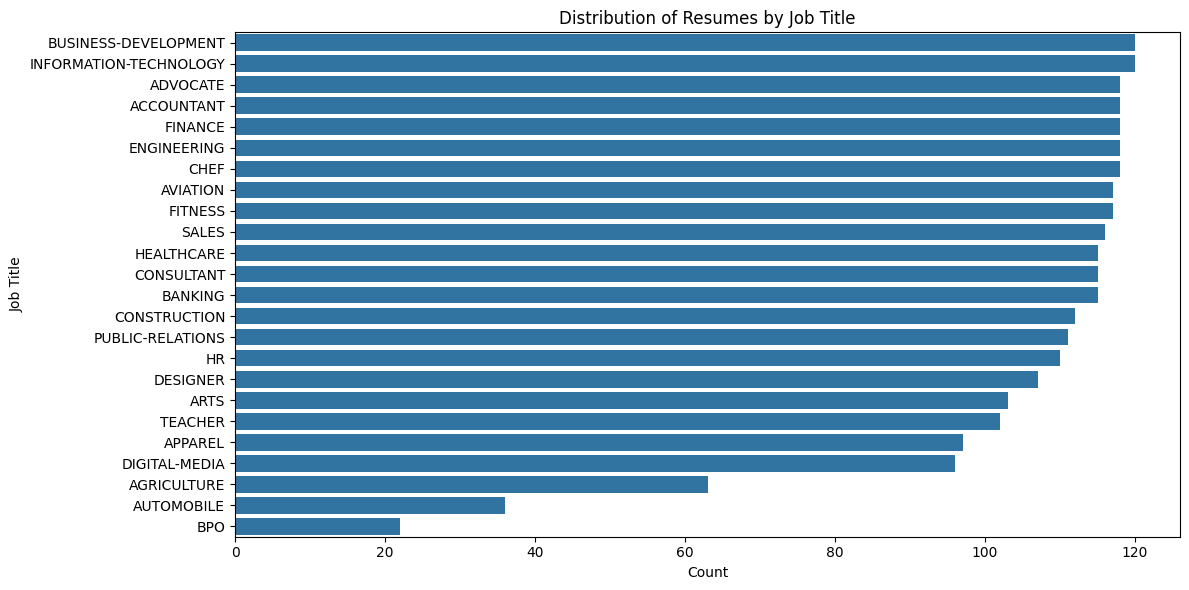

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
# Job Title Distribution
plt.figure(figsize=(12,6))
sns.countplot(data=resume_df, y='job_title', order=resume_df['job_title'].value_counts().index)
plt.title('Distribution of Resumes by Job Title')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()


/tmp/ipython-input-24-449094424.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_skills, x='Count', y='Skill', palette='viridis')


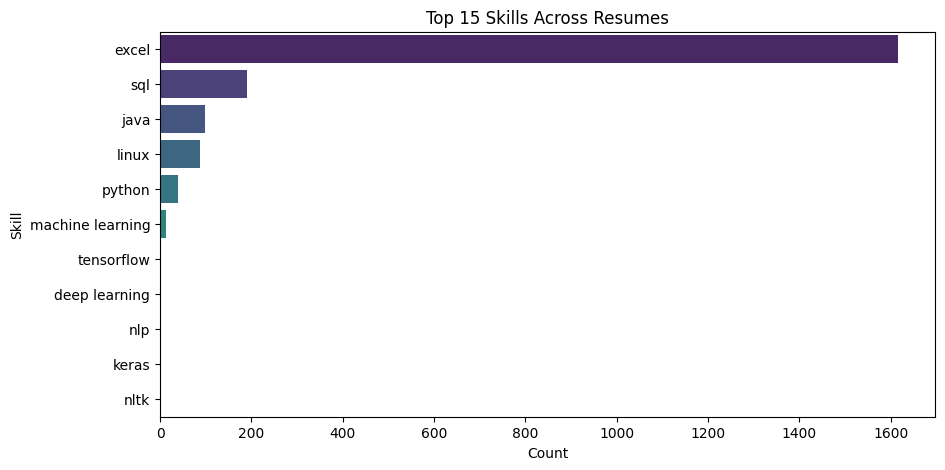

In [24]:
from collections import Counter
# Top Skills Frequency
all_skills = sum(resume_df['skills'], [])
skill_counts = Counter(all_skills)

top_skills = pd.DataFrame(skill_counts.most_common(15), columns=['Skill', 'Count'])

plt.figure(figsize=(10,5))
sns.barplot(data=top_skills, x='Count', y='Skill', palette='viridis')
plt.title('Top 15 Skills Across Resumes')
plt.show()


In [19]:
# Job Title Classification
X = resume_df['resume_text']
y = resume_df['job_title']

vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))


--- Classification Report ---
                        precision    recall  f1-score   support

            ACCOUNTANT       0.75      0.86      0.80        28
              ADVOCATE       0.78      0.21      0.33        34
           AGRICULTURE       0.00      0.00      0.00        11
               APPAREL       1.00      0.17      0.29        18
                  ARTS       1.00      0.04      0.08        23
            AUTOMOBILE       0.00      0.00      0.00         6
              AVIATION       0.61      0.55      0.58        20
               BANKING       0.54      0.70      0.61        20
                   BPO       0.00      0.00      0.00         5
  BUSINESS-DEVELOPMENT       0.63      0.49      0.55        35
                  CHEF       0.70      0.86      0.78        22
          CONSTRUCTION       0.78      0.75      0.77        24
            CONSULTANT       0.20      0.05      0.08        21
              DESIGNER       0.92      0.52      0.67        23
        

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


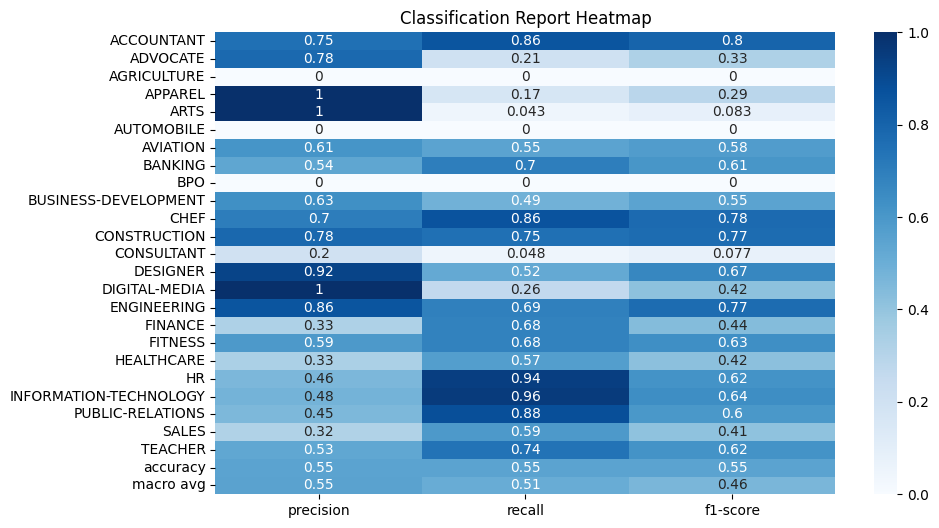

In [25]:
# Classification Report as Heatmap
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

plt.figure(figsize=(10,6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report Heatmap')
plt.show()


In [20]:
# Resume Scoring Against a Given Job Description
job_description = "Looking for an NLP engineer with Python, spaCy, scikit-learn, and machine learning experience."
job_desc_clean = clean_text(job_description)
job_desc_vec = vectorizer.transform([job_desc_clean])

cosine_scores = cosine_similarity(job_desc_vec, X_tfidf).flatten()
resume_df['relevance_score'] = cosine_scores

In [21]:
# Show top 5 most relevant resumes
top_resumes = resume_df.sort_values(by='relevance_score', ascending=False).head(5)

print("\n--- Top 5 Matching Resumes ---")
print(top_resumes[['resume_filename', 'job_title', 'skills', 'relevance_score']])


--- Top 5 Matching Resumes ---
     resume_filename    job_title  \
1195    62994611.pdf  AGRICULTURE   
767     34953092.pdf      BANKING   
1667    55953734.pdf  ENGINEERING   
600     12777487.pdf         ARTS   
1589    12011623.pdf  ENGINEERING   

                                                 skills  relevance_score  
1195  [keras, tensorflow, nltk, python, java, sql, e...         0.101563  
767                     [machine learning, python, sql]         0.081975  
1667                                           [python]         0.081487  
600                                                  []         0.080527  
1589             [machine learning, python, excel, sql]         0.078860  


/tmp/ipython-input-26-2806420865.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_scores, x='relevance_score', y='resume_filename', palette='mako')


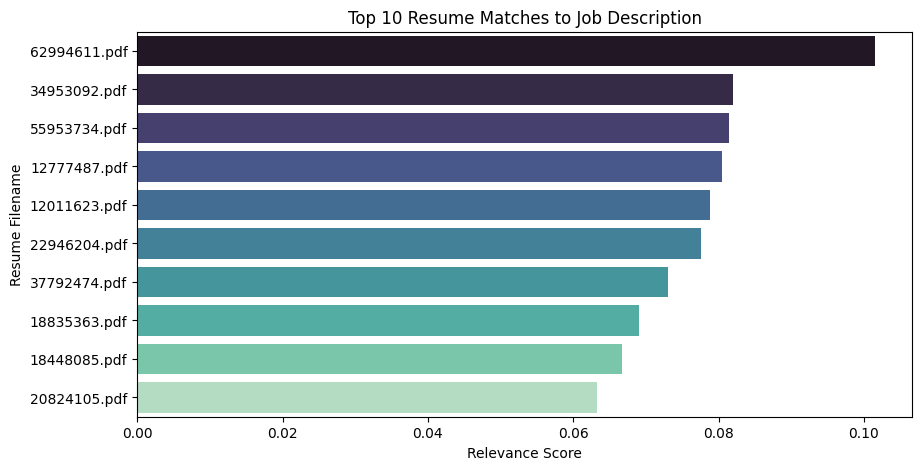

In [26]:
# Resume Relevance Scores vs Job Description
top_scores = resume_df.sort_values(by='relevance_score', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(data=top_scores, x='relevance_score', y='resume_filename', palette='mako')
plt.xlabel('Relevance Score')
plt.ylabel('Resume Filename')
plt.title('Top 10 Resume Matches to Job Description')
plt.show()


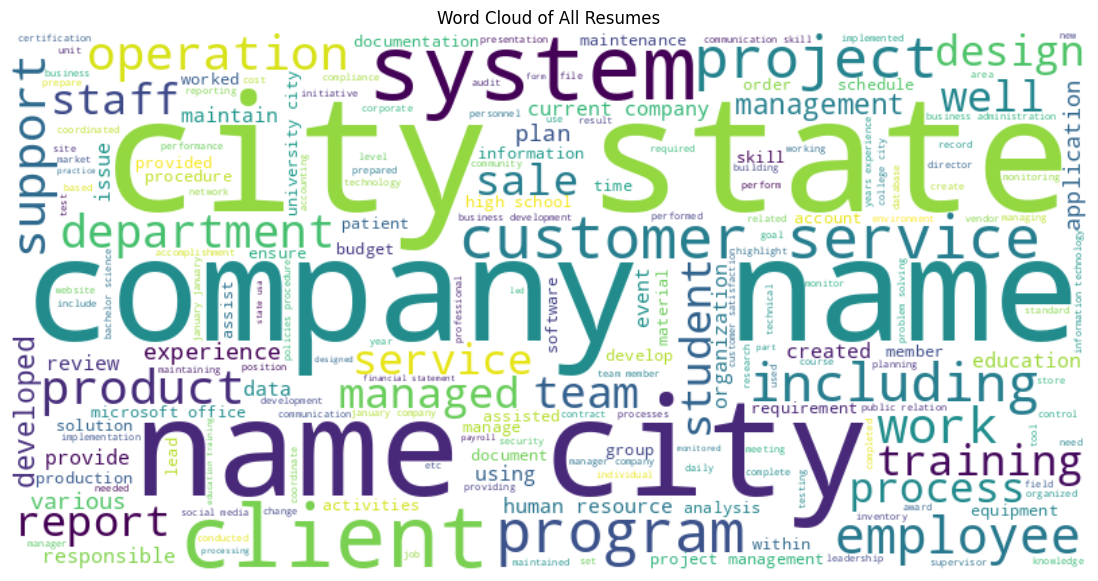

In [27]:
#Word Cloud of Resume Texts
from wordcloud import WordCloud

all_text = ' '.join(resume_df['resume_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Resumes')
plt.show()
